# **FOREWORD**

This work is based on the amazing baseline notebook from Ravi: https://www.kaggle.com/code/ravi20076/playgrounds5e11-public-baseline-v1

I've modified to use Autogluon instead.

## Installing autogluon

This used to be a pain with pip. Now, `uv` works so much better.

In [1]:
!uv pip install autogluon

Using Python 3.11.13 environment at: /usr
Resolved 229 packages in 6.82s
   Building seqeval==1.2.2
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
⠙ Preparing packages... (0/51)
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
⠙ Preparing packages... (0/51)
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
⠙ Preparing packages... (0/51)
jsonschema ------------------------------     0 B/86.39 KiB
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
⠙ Preparing packages... (0/51)
jsonschema ------------------------------ 14.88 KiB/86.39 KiB
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
⠙ Preparing packages... (0/51)
tensorboardx ------------------------------     0 B/85.16 KiB
jsonschema ------------------------------ 14.88 KiB/86.39 KiB
   Building seqeval==1.2.2
   Building nvidia-ml-py3==7.352.0
⠙ Preparing packages... (0/51)
evaluate   -----------------------

In [2]:
import warnings, torch
import pandas as pd, numpy as np
from itertools import combinations
from tqdm.notebook import tqdm
warnings.simplefilter('ignore')


In [3]:
import os
def is_interactive():
   return os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == "Interactive"
print("is interactive session?", is_interactive())
preset_quality = "medium_quality" if is_interactive() else "best_quality"

time_limit = 60 if is_interactive() else 60 * 3# * 60 * 9  #3600

is interactive session? False


# **PREPROCESSING**

In [4]:

train = pd.read_csv('/kaggle/input/playground-series-s5e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e11/test.csv')
orig = pd.read_csv('/kaggle/input/loan-prediction-dataset-2025/loan_dataset_20000.csv')

print('Train Shape:', train.shape)
print('Test Shape:', test.shape)
print('Orig Shape:', orig.shape)

TARGET = 'loan_paid_back'
CATS   = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
BASE   = [col for col in train.columns if col not in ['id', TARGET]]

Train Shape: (593994, 13)
Test Shape: (254569, 12)
Orig Shape: (20000, 22)


# **FEATURE ENGINEERING**

In [5]:

# INTER = []

# for col1, col2 in tqdm(combinations(BASE, 2)):
#     new_col_name = f'{col1}_{col2}'
#     INTER.append(new_col_name)
#     for df in [train, test, orig] :
#         df[new_col_name] = df[col1].astype(str) + '_' + df[col2].astype(str)
        
# print(f'{len(INTER)} Features')

# for col1, col2, col3 in combinations(CATS, 3 ):
#     new_col_name = f'{col1}_{col2}_{col3}'
#     INTER.append(new_col_name)
#     for df in [train, test, orig]:
#         df[new_col_name] = df[col1].astype(str) + '_' + df[col2].astype(str) + df[col3].astype(str)
        
# print(f'{len(INTER)} Features')

# ORIG = []

# for col in BASE:
#     # MEAN
#     mean_map = orig.groupby(col)[TARGET].mean()
#     new_mean_col_name = f"orig_mean_{col}"
#     mean_map.name = new_mean_col_name
    
#     train = train.merge(mean_map, on=col, how='left')
#     test = test.merge(mean_map, on=col, how='left')
#     ORIG.append(new_mean_col_name)

#     # COUNT
#     new_count_col_name = f"orig_count_{col}"
#     count_map = orig.groupby(col).size().reset_index(name=new_count_col_name)
    
#     train = train.merge(count_map, on=col, how='left')
#     test  = test.merge(count_map, on=col, how='left')
#     ORIG.append(new_count_col_name)

# print(len(ORIG), 'Orig Features Created!!')

# FEATURES = BASE + ORIG + INTER
# print(len(FEATURES), 'Features.')

# X = train[FEATURES]
# y = train[TARGET]

# **MODEL TRAINING**

In [6]:
train

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0


In [7]:
from autogluon.tabular import  TabularDataset, TabularPredictor

## Training and Predicting

In [8]:
!ls /tmp

clean-layer.sh	kaggle.log  tmph7zno7vc.json  uv-b17927aca3d28934.lock


In [9]:
predictor = TabularPredictor(label = TARGET)

print(preset_quality, time_limit)
# TRAIN AUTOGLUON
predictor.fit(train,
              presets = preset_quality,
              time_limit = time_limit,
              auto_stack = True,
              #num_bag_folds = 7,
              #num_bag_sets = 3,
              num_cpus = 4,
              verbosity = 1,
              #ag_args_fit={'num_gpus': 1}
             )

No path specified. Models will be saved in: "AutogluonModels/ag-20251102_102447"


best_quality 180


2025-11-02 10:24:51,647	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


In [10]:
predictor.leaderboard()


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.902454,accuracy,14.575708,69.318454,14.575708,69.318454,1,True,1
1,WeightedEnsemble_L3,0.902454,accuracy,14.623406,71.224716,0.047698,1.906263,3,True,4
2,WeightedEnsemble_L2,0.902454,accuracy,14.627177,69.358796,0.051469,0.040342,2,True,2
3,LightGBMXT_BAG_L2,0.902228,accuracy,21.624497,114.991133,7.048789,45.672679,2,True,3


In [11]:
importance_df = predictor.feature_importance(train[:100])

importance_df.style.background_gradient(subset=['importance', 'stddev'], cmap='Blues')

,importance,stddev,p_value,n,p99_high,p99_low
employment_status,0.218000,0.010954,0.000001,5,0.240555,0.195445
debt_to_income_ratio,0.006000,0.005477,0.035242,5,0.017278,-0.005278
credit_score,0.004000,0.013416,0.270735,5,0.031625,-0.023625
id,0.000000,0.000000,0.500000,5,0.000000,0.000000
annual_income,0.000000,0.000000,0.500000,5,0.000000,0.000000
loan_amount,0.000000,0.000000,0.500000,5,0.000000,0.000000
interest_rate,0.000000,0.000000,0.500000,5,0.000000,0.000000
gender,0.000000,0.000000,0.500000,5,0.000000,0.000000
marital_status,0.000000,0.000000,0.500000,5,0.000000,0.000000
education_level,0.000000,0.000000,0.500000,5,0.000000,0.000000


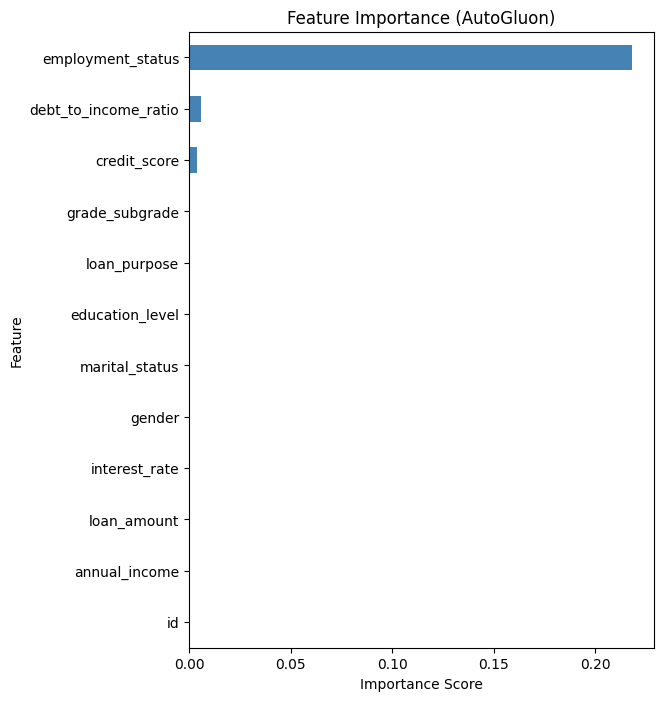

In [12]:
import matplotlib.pyplot as plt
imp = importance_df['importance'].sort_values(ascending=True)

plt.figure(figsize=(6, 8))
imp.plot(kind='barh', color='steelblue')
plt.title('Feature Importance (AutoGluon)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [13]:

# TEST DATA PREDICTION
y_test = predictor.predict(test)

submission = pd.read_csv(
        f"/kaggle/input/playground-series-s5e11/sample_submission.csv")

submission["loan_paid_back"] = y_test

submission.reset_index()
submission.to_csv("submission.csv", index=False)
submission

,id,loan_paid_back
0,593994,1.0
1,593995,1.0
2,593996,0.0
3,593997,1.0
4,593998,1.0
...,...,...
254564,848558,1.0
254565,848559,1.0
254566,848560,1.0
254567,848561,1.0
